## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [1]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [2]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('/Users/zoec/Documents/python/datacamp/Exploring 67 years of LEGO/datasets/colors.csv')

# Print the first few rows
colors.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [20]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
id          135 non-null int64
name        135 non-null object
rgb         135 non-null object
is_trans    135 non-null object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [19]:
# How many distinct colors are available?
# -- YOUR CODE FOR TASK 3 --
num_colors=colors.shape[0]
num_colors

135

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [4]:
# colors_summary: Distribution of colors based on transparency
# -- YOUR CODE FOR TASK 4 --
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

In [21]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('/Users/zoec/Documents/python/datacamp/Exploring 67 years of LEGO/datasets/sets.csv')

In [23]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [24]:

# Create a summary of average number of parts by year: `parts_by_year`

parts_by_year = sets.groupby('year')['num_parts'].mean()
parts_by_year


year
1950     10.142857
1953     16.500000
1954     12.357143
1955     36.857143
1956     18.500000
1957     42.619048
1958     44.452381
1959     16.250000
1960    175.333333
1961     70.588235
1962     81.750000
1963     33.333333
1964     82.636364
1965    107.100000
1966     40.651685
1967     98.666667
1968    127.200000
1969     64.594203
1970     84.793103
1971     67.022222
1972    102.842105
1973    103.367647
1974    116.769231
1975    155.225806
1976    153.029412
1977     91.500000
1978    146.616438
1979    105.414634
1980    126.636364
1981     97.835443
           ...    
1988    144.250000
1989    102.061404
1990    202.035294
1991    166.424528
1992    119.617391
1993    148.432432
1994    127.640625
1995    179.039062
1996    201.770833
1997    129.221649
1998    141.126154
1999    105.543333
2000    104.376147
2001    104.365782
2002    115.700224
2003    159.681928
2004    138.862534
2005    198.745455
2006    246.904594
2007    229.025078
2008    231.644699
2009   

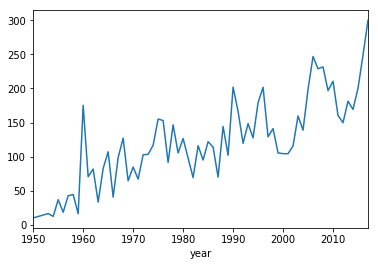

In [25]:
# Plot trends in average number of parts by year
parts_by_year.plot()


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [26]:
# themes_by_year: Number of themes shipped by year
# -- YOUR CODE HERE --
themes_by_year = sets[['year','theme_id']].groupby('year', as_index = False)

In [18]:
for key, item in themes_by_year:
    print (themes_by_year.get_group(key), "\n\n")

      year  theme_id
7062  1950       371
7065  1950       371
7081  1950       366
7083  1950       371
7084  1950       371
7085  1950       371
7086  1950       371 


      year  theme_id
7069  1953       371
7078  1953       371
7082  1953       371
7094  1953       371 


      year  theme_id
7071  1954       371
7072  1954       371
7075  1954       371
7076  1954       371
7087  1954       371
7088  1954       371
7089  1954       371
7090  1954       371
7091  1954       371
7092  1954       371
7093  1954       371
7096  1954       372
7097  1954       372
7099  1954       371 


       year  theme_id
654    1955       372
669    1955       372
672    1955       372
674    1955       372
676    1955       372
678    1955       371
680    1955       371
682    1955       371
684    1955       371
686    1955       371
688    1955       371
690    1955       371
693    1955       371
695    1955       371
697    1955       371
700    1955       371
701    1955       371
702    


       year  theme_id
174    2009       193
175    2009       240
176    2009       165
177    2009       276
178    2009       155
179    2009       169
180    2009       227
240    2009       259
1395   2009       162
1396   2009        22
1397   2009       161
1399   2009       161
1400   2009        22
1401   2009       324
1416   2009       232
1455   2009       252
1456   2009       252
1457   2009       252
1458   2009       252
1882   2009       501
1887   2009       141
1888   2009        63
1889   2009        56
1890   2009       332
1891   2009       497
1892   2009       169
1968   2009        60
1970   2009        58
1971   2009        61
1972   2009        56
...     ...       ...
11383  2009       408
11406  2009       240
11453  2009       141
11454  2009       153
11476  2009        61
11488  2009       389
11533  2009       245
11542  2009       439
11543  2009       331
11599  2009       301
11605  2009       301
11607  2009       301
11627  2009       425
11676  20

In [11]:
themes_by_year = sets[['year','theme_id']].groupby('year', as_index = False).agg({'theme_id' : pd.Series.nunique})

themes_by_year

,year,theme_id
0,1950,2
1,1953,1
2,1954,2
3,1955,4
4,1956,3
5,1957,4
6,1958,3
7,1959,3
8,1960,3
9,1961,6


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [ ]:
# Nothing to do here